In [5]:
import lightgbm as lgb
import pandas as pd
from sklearn.model_selection import TimeSeriesSplit, cross_val_score
from sklearn.metrics import mean_absolute_error

df = pd.read_csv('../data/processed/train_data_processed.csv')
df['datetime'] = pd.to_datetime(df['datetime'])


In [ ]:
df = df.copy()
features = [c for c in df.columns if c not in ["datetime", "total_sales"]]
split_index = int(len(df)*0.8)
df_train = df.iloc[0:split_index]
df_valid = df.iloc[split_index:]
X = df_train[features]
y = df_train["total_sales"]

tscv = TimeSeriesSplit(n_splits=5)

#model = lgb.LGBMRegressor(learning_rate=0.011, max_depth=3, n_estimators=313, colsample_bytree=0.776)
model = lgb.LGBMRegressor()

scores = cross_val_score(model, X, y, cv=tscv, scoring="neg_mean_absolute_error")

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0,000086 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 90
[LightGBM] [Info] Number of data points in the train set: 1030, number of used features: 9
[LightGBM] [Info] Start training from score 444,806002
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

(1150.0, 1280.0)

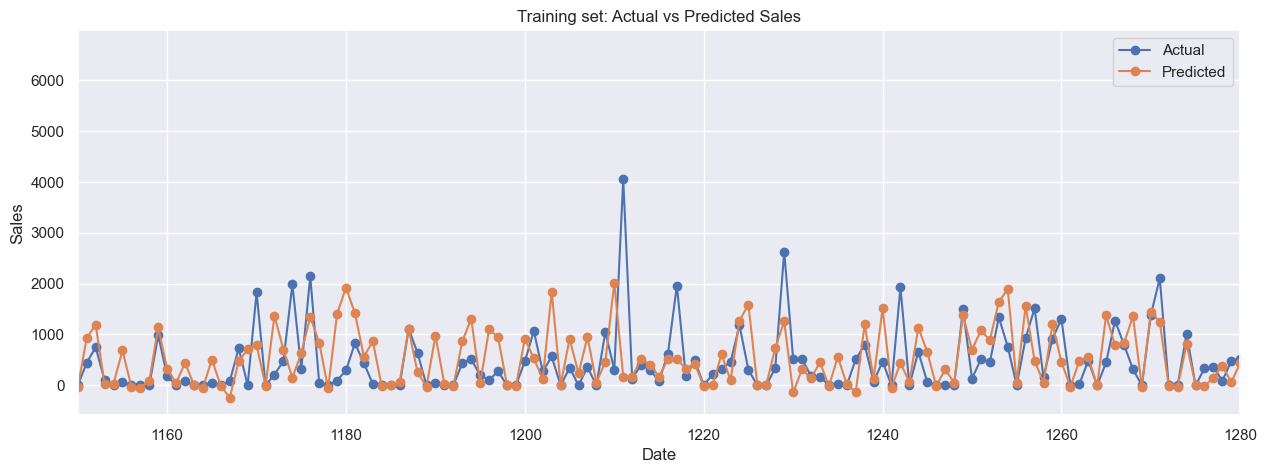

In [27]:
import seaborn as sns
sns.set_theme()
model.fit(X, y)
X_valid = df_valid[features]
y_valid = df_valid['total_sales']
y_pred_valid = model.predict(X_valid)
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))
plt.plot(y_valid.index, y_valid, label="Actual", marker='o')
plt.plot(y_valid.index, y_pred_valid, label="Predicted", marker='o')
plt.xlabel("Date")
plt.ylabel("Sales")
plt.title("Training set: Actual vs Predicted Sales")
plt.legend()
plt.xlim([1150, 1280])